# Algorithms 202: Coursework 2 Task 2: Random Shuffling

Group-ID: 23

Group members: 

 * Balint Rikker
 * Peng Peng
 * John Oliver

## Objectives

The aim of this coursework is to enhance your algorithmic skills by developing algorithms from textual, non-formal descriptions. You are asked to show that you can:

- implement different random shuffling algorithms
- compare those algorithms using visual representations

This notebook *is* the coursework. It contains cells with function definitions that you will need to complete. You will submit this notebook as your coursework.

## Preliminaries: helper functions

Here we define a collection of functions that will be useful for the rest of the coursework. You'll need to run this cell to get started.

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import random
import numpy as np

## Task 2: Random Shuffling

In this task you are asked to implement `random_sort_shuffle` and `fisher_yates_shuffle`. Additionally, you will need to implement visualisation techniques that can be used to compare the output of the different random shuffling algorithms.

Complete the below function definitions in the provided skeleton code. Do not change the names of the functions or their arguments.

### 2a. Implement `random_sort_shuffle`

The `random_sort_shuffle` function should follow the idea of using a random comparator for sorting the array `a`. See lecture slides for details. You might want to search the web for hints on how to use Python's sort function with a custom comparator. (`functools.cmp_to_key` will be very useful)

In [3]:
from functools import cmp_to_key

# random compartor used for random sorting
def random_comparator(x,y):
    return random.randint(-1,1)

# random sort shuffling, does not change the given array
def random_sort_shuffle(a):
    b = a[:]  # get copy of input array
    return sorted(b, key=cmp_to_key(random_comparator))

In [22]:
# function used to test the shuffling methods
def test_shuffle(shuffle, numOfTests, length):
    a = [i for i in range(numOfTests)]
    for i in range (0, numOfTests):
        b = shuffle(a)
        print(b)

# testing random_sort_shuffle
test_shuffle(random_sort_shuffle, 10, 10)

[1, 2, 3, 5, 4, 0, 8, 6, 9, 7]
[0, 5, 1, 2, 3, 4, 6, 7, 8, 9]
[9, 1, 0, 5, 3, 2, 4, 7, 6, 8]
[2, 3, 5, 9, 1, 0, 8, 7, 4, 6]
[0, 1, 2, 3, 4, 8, 7, 6, 5, 9]
[0, 7, 2, 1, 4, 6, 5, 9, 3, 8]
[0, 1, 2, 7, 9, 3, 4, 6, 5, 8]
[1, 0, 5, 4, 2, 7, 3, 8, 6, 9]
[0, 1, 6, 2, 3, 4, 5, 9, 7, 8]
[0, 1, 2, 9, 3, 8, 4, 5, 6, 7]


### 2b. Implement `fisher_yates_shuffle`

The `fisher_yates_shuffle` function should implement one of the two versions of Fisher-Yates shuffle as outlined in the lecture slides.

In [23]:
# implementation of the fisher yates random shuffling method
def fisher_yates_shuffle(b):
    a = b[:]    # get copy of input array
    n = len(a)
    for i in range(0, n):
        # finding index to swap
        j = random.randint(i, n - 1)
        # shuffling
        a[i], a[j] = a[j], a[i]
    return a

# the default random shuffling method of pyhton used as oracle for control test
from random import shuffle
def oracle(b):
    a = b[:]
    shuffle(a)
    return a

# testing fisher_yates_shuffle
test_shuffle(fisher_yates_shuffle, 10, 10)

[7, 9, 8, 4, 5, 6, 2, 1, 0, 3]
[7, 0, 9, 4, 6, 8, 1, 2, 5, 3]
[6, 5, 0, 8, 2, 4, 3, 9, 7, 1]
[0, 9, 2, 5, 7, 6, 3, 1, 4, 8]
[9, 1, 6, 7, 5, 0, 4, 3, 2, 8]
[4, 6, 8, 7, 2, 3, 9, 5, 0, 1]
[5, 7, 3, 1, 4, 2, 9, 8, 0, 6]
[0, 1, 8, 2, 7, 3, 4, 5, 6, 9]
[2, 4, 8, 9, 6, 0, 3, 5, 1, 7]
[9, 3, 0, 1, 5, 2, 4, 7, 6, 8]


### 2c. Implement buggy `fisher_yates_shuffle`

Check out the lecture slides for two common bugs that are found in Fisher-Yates shuffle implementations. Implement two buggy versions of `fisher_yates_shuffle` for later analysis.

In [26]:
# a buggy implementation of fisher yates random shuffling
def fisher_yates_shuffle_buggy1(b):
    a = b[:]    # get copy of input array
    n = len(a) - 1
    for i in range(n, 0, -1):
        j = random.randint(0, i-1)
        a[i], a[j] = a[j], a[i]
    return a

# another buggy implementation of fisher yates random shuffling
def fisher_yates_shuffle_buggy2(b):
    a = b[:] # get copy of input array
    n = len(a) - 1
    for i in range(n, 0, -1):
        j = random.randint(0, n)
        a[i], a[j] = a[j], a[i]
    return a

# testing fisher_yates_shuffle_buggy1
test_shuffle(fisher_yates_shuffle_buggy1, 10, 10)
print('')
# testing fisher_yates_shuffle_buggy2
test_shuffle(fisher_yates_shuffle_buggy2, 10, 10)

[6, 9, 0, 5, 2, 8, 1, 3, 4, 7]
[2, 5, 9, 1, 6, 7, 3, 0, 4, 8]
[3, 6, 0, 5, 9, 4, 2, 1, 7, 8]
[7, 0, 8, 9, 5, 2, 3, 6, 1, 4]
[3, 0, 6, 8, 7, 2, 9, 5, 4, 1]
[3, 4, 9, 5, 2, 6, 1, 0, 7, 8]
[9, 2, 7, 0, 8, 3, 5, 4, 6, 1]
[7, 2, 9, 6, 3, 0, 5, 1, 4, 8]
[7, 4, 9, 8, 0, 6, 3, 2, 1, 5]
[6, 4, 3, 8, 7, 9, 2, 5, 1, 0]

[6, 9, 8, 5, 2, 1, 0, 3, 7, 4]
[7, 2, 0, 4, 1, 9, 8, 6, 5, 3]
[0, 2, 1, 8, 3, 4, 5, 7, 9, 6]
[8, 9, 3, 0, 2, 5, 4, 6, 1, 7]
[0, 8, 6, 5, 9, 3, 1, 7, 2, 4]
[7, 0, 4, 2, 8, 3, 9, 6, 1, 5]
[0, 8, 4, 7, 6, 3, 9, 1, 2, 5]
[5, 3, 2, 9, 1, 6, 0, 7, 4, 8]
[5, 4, 6, 3, 2, 0, 1, 8, 9, 7]
[0, 1, 9, 5, 4, 8, 3, 6, 7, 2]


### 2d. Perform empirical analysis

The empirical analysis is aiming to detect bias in the shuffle algorithms implemented above. You should build a swap matrix for each shuffle algorithm by executing them multiple times on suitable sequences with a fixed number of elements that allow you to track the random shuffles of elements.

You can visualise the swap matrices using the `plt.imshow(matrix)` function (see also the notebook on Random Sampling on the use of `plt.imshow`).

Plot the swap matrices and add a few lines of discussion about what you can conclude from the visualisations about possible bias in the different algorithms.

legend: vertical axis = new position, horizontal axis = new position


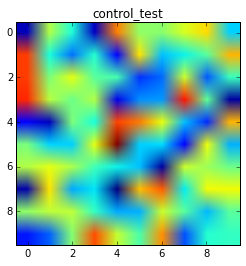

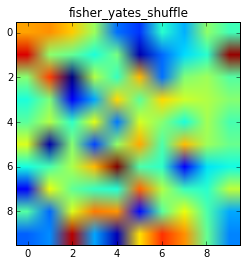

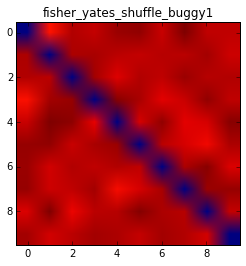

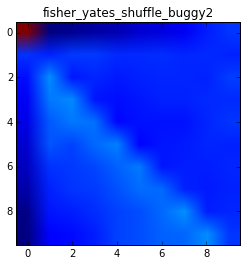

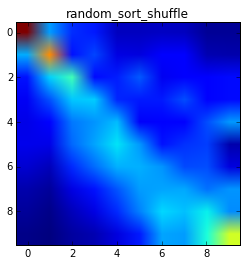

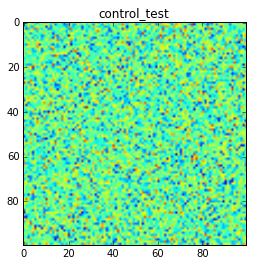

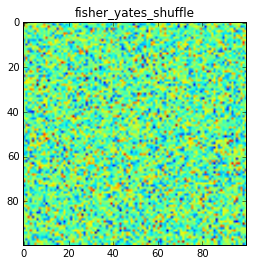

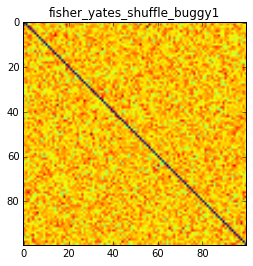

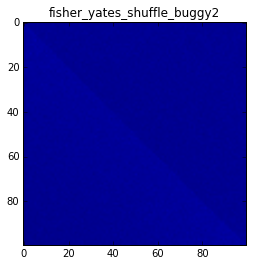

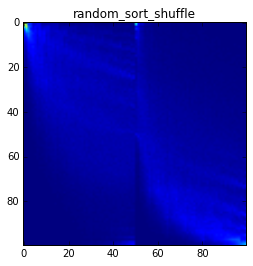

In [42]:
# function for analysing the performance of given 'shuffling' method
# by plotting the swap matrix
def analyse(n, feq, shuffling, name, printMatrix):
    a = [i for i in range(n)]
    matrix = np.empty((n, n))
    matrix.fill(0)
    for i in  range(0, feq):
        b = shuffling(a)
        for j in range(0, n):
            matrix[j][b[j]] += 1
            
    for i in range(0, n):
        for j in range(0, n):
            matrix[i][j] = matrix[i][j]
    plt.figure()
    plt.title(name)
    if (printMatrix):
        print(matrix)
    plt.imshow(matrix)

# function to analyse all random shuffling methods
def plot_shuffle(size, feq, printMatrix):
    analyse(size, feq, oracle, 'control_test', printMatrix)
    analyse(size, feq, fisher_yates_shuffle, 'fisher_yates_shuffle', printMatrix)
    analyse(size, feq, fisher_yates_shuffle_buggy1, 'fisher_yates_shuffle_buggy1', printMatrix)
    analyse(size, feq, fisher_yates_shuffle_buggy2, 'fisher_yates_shuffle_buggy2', printMatrix)
    analyse(size, feq, random_sort_shuffle, 'random_sort_shuffle', printMatrix)

print('legend: vertical axis = new position, horizontal axis = new position')
# group 1 array size = 10, iterations = 10000
plot_shuffle(10, 10000, False)
# group 2 array size = 100 iterations = 10000
plot_shuffle(100, 10000, False)

I the above plots, it can be seen that the fisher_yates_shuffle has a rather consistent color patterns across the entire swap matrix. This is especially true for larger array size(100). At the same time, the plot for fisher_yates_shuffle is also very similar to that of the plot for the swap matrix generated for the native random shuffling method used by pyhton. Togather, this shows that the implementation for fisher_yates_shuffle is corret, and shuffles the array without any significant bias(assuming a good random number generator is provided).

For all other random shuffling methods, there are obvious inconsistencies in the color patterns of the their swap matrices. This shows that they are biased.

For fisher_yates_shuffle_buggy1, the inconsistencies are very clear for both large and small array sizes, where the color on the diagonal is different from else where. This shows that there is a bias for shuffling elements to new positions over letting them stay at their original positions.

For both fisher_yates_shuffle_buggy2 and random_sort_shuffle, the inconsistencies are clearer for smaller array sizes. Though it can be observed that there are inconsistencies on the diagonal of the swap matrices, the more obvious inconsistencies are located on the top left and bottom right corners of the matrices. By analysing the color pattern and numerical values of the swap matrices, we found that for fisher_yates_shuffle_buggy2, there is slight bias for shuffling elements to new positions over letting them stay at their original positions and a strong bias for the first element to stay in its original position.

For random_sort_shuffling there is a bias for elements to stay at their original positions over shuffling them to new positions, with the biasness become increasingly strong for elements nearer to the start and end of the array.